In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import napari
import colorcet as cc

import dnt

spots_directory = Path(r"D:\Tracking\DrosophilaNucleusTracking\data\spots")
save_path = Path(r"D:\Tracking\DrosophilaNucleusTracking\figures\output\movement")

include = [1, 3, 4, 6, 7, 8]

dnt.set_plot_style({'text.color': 'white'})
spots_dfs, metadatas, stems = dnt.load_spots_data(spots_directory, include)

df = spots_dfs[0]
cycles = [10, 11, 12, 13, 14]
earliest_frames = [25, 48, 43, 63, 80, 30]

print(df.columns)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['lightsheet_20241104_spots', 'lightsheet_20250131_spots', 'lightsheet_20250206_spots', 'lightsheet_20250414_spots', 'lightsheet_20250625_spots', 'lightsheet_20250627_spots', 'lightsheet_20250702_spots', 'lightsheet_20250704_spots', 'lightsheet_20250705_spots', 'lightsheet_bcd_20251105a_spots', 'lightsheet_bcd_20251106_spots', 'lightsheet_trk_20250318_spots', 'lightsheet_trk_20250319a_spots', 'lightsheet_trk_20250319b_spots', 'lightsheet_trk_20250321_spots', 'lightsheet_trk_20250325_spots']


reading spots dfs: 0it [00:00, ?it/s]

[  0  35  60 110 160 280] 25 246


reading spots dfs: 2it [00:00,  2.24it/s]

[  0  50  80 140 200 280] 0 283


reading spots dfs: 4it [00:02,  1.86it/s]

[  0  55  90 140 200 350] 0 332


reading spots dfs: 5it [00:03,  1.07it/s]

[  0  65 100 150 225 350] 0 311


reading spots dfs: 7it [00:05,  1.20it/s]

[  0  85 125 170 225 350] 0 325


reading spots dfs: 8it [00:06,  1.01it/s]

[  0  42  65 130 200 350] 0 320


reading spots dfs: 16it [00:08,  1.81it/s]

Index(['time_since_nc11', 'z', 'y', 'x', 'AP', 'theta', 'area', 'radius',
       'intensity_mean', 'cycle', 'display_z', 'display_y', 'display_x',
       'px_z', 'px_y', 'px_x', 'px_area', 'uv_v', 'uv_u', 'uv_z',
       'uv_distance_from_edge', 'distance_from_surface', 'uv_area',
       'area_distortion', 'mesh_name', 'interpolated', 'track_id',
       'tracklet_id', 'parent_id', 'n_children', 'n_parents', 'AP_raw',
       'AP_um', 'AP_um_centered', 'um_from_anterior', 'um_from_posterior',
       'distance_to_pole', 'time', 'trk', 'problematic', 'frame',
       'trackmate_id', 'status', 'source', 'is_parent', 'is_child',
       'pseudotime', 'distance', 'cycle_pseudotime', 'dx', 'dy', 'dz', 'dAP',
       'dtheta', 'dtot', 'dAP_abs'],
      dtype='object')


In [3]:
import pandas as pd
from itertools import pairwise

df = spots_dfs[0].copy()

df["trackid_frame"] = list(zip(df["track_id"], df["frame"]))
df["track_ap"] = df["trackid_frame"].map(df.groupby("trackid_frame")["AP"].mean())
df["offset_ap"] = df["AP"] - df["track_ap"]

df = df[df["time_since_nc11"] > -5]
df["first_ap"] = df["track_id"].map(df.groupby("track_id")["AP"].first())

time_since_nc11_bins = np.linspace(-5, df["time_since_nc11"].max(), 20)
df["time_bin"] = pd.cut(df["time_since_nc11"], time_since_nc11_bins, labels=[f"{time_since_nc11_bin: 0.0f}" for time_since_nc11_bin in time_since_nc11_bins[:-1]])

ap_dist_bins = np.linspace(-0.1, 0.15, 25)
df["ap_dist_bin"] = pd.cut(df["AP"] - df["first_ap"], ap_dist_bins, labels=[f"{ap_dist_bin: 0.2f}" for ap_dist_bin in ap_dist_bins[:-1]])

ap_offset_bins = np.linspace(-0.085, 0.085, 18, endpoint=True)
print(ap_offset_bins)
df["ap_offset_bin"] = pd.cut(df["offset_ap"], ap_offset_bins, labels=[f"{(a + b) / 2: 0.2f}" for a, b in pairwise(ap_offset_bins)])

heatmap_data = df.groupby(["time_bin", "ap_offset_bin"]).size().unstack(fill_value=0)

[-0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005  0.005
  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085]


C:\Users\Harrison\AppData\Local\Temp\ipykernel_21176\41461893.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["time_bin", "ap_offset_bin"]).size().unstack(fill_value=0)


In [25]:
rc = {
    "figure.facecolor": "#FFFFFF00",
    "axes.facecolor": "#FFFFFF00",
    "legend.framealpha": 0.2,
    "lines.color": "white",
    "svg.fonttype": "none",
    "pdf.fonttype": 42,
    "axes.labelsize": 10,
    "axes.titlesize": 12,
    "font.size": 10,
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    }


sns.set_theme(style="ticks", font="Arial", rc=rc)

In [22]:
rcParams = mpl.rcParams
rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': '#FFFFFF00',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

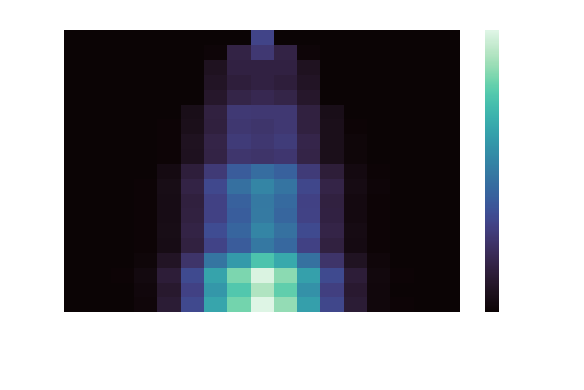

In [10]:
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, cmap="mako", cbar_kws={"label": "Number of Nuclei"}, annot_kws={"color": "white"}, fmt="d")
plt.xlabel("Position relative to lineage centroid (AP axis fraction)")
plt.ylabel("Time since nc11")
plt.title("Position relative to lineage over time")
plt.tight_layout()
plt.show()

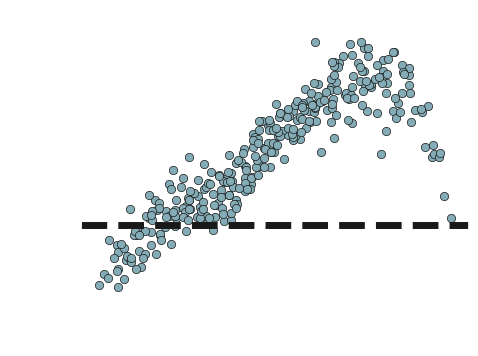

In [26]:
condition_pal = ["#28536B", "#F37748", "#EEE1B3"]
earliest_frames = [25, 43, 63, 80, 80, 150, 23, 36, 17, 70, 3]

plt.figure(figsize=(5, 3.5))

for i, df in enumerate(spots_dfs[:1]):
    df = df[df["frame"] >= earliest_frames[i]].copy()

    min_mvmt_frames, times = dnt.find_stationary_timepoints(df)

    df_subset = df[df["frame"].isin(min_mvmt_frames)]
    t = df_subset.groupby(["track_id", "cycle"])[["AP"]].mean().unstack()

    """
    Plot nuclear movement along AP axis
    """
    cycle = 14
    plt.scatter(t.loc[:, ("AP", 10)], t.loc[:, ("AP", cycle)] - t.loc[:, ("AP", 10)], color='#84ACB6', edgecolors="k", linewidths=0.5)

    plt.ylabel("AP movement by nc14")
    plt.xlabel("AP position at cycle 10")
    plt.axhline(0, color="k", linestyle="--", linewidth=5)
    plt.title("Nuclear movement along AP axis")

    plt.savefig(r"D:\OneDrive - Princeton University\Presentations\Shvartsman lab retreat 2025\movement.png", dpi=300)

    plt.show()